<a href="https://colab.research.google.com/github/Joaco-l/Portfolio/blob/main/Joquinlopez_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final**

Entrenamiento y optimización de Modelos de Machine Learning

Dataset Elegido: "Financial+Consumer+Complaints.csv"

Fuente: https://data.world/mesum/rwfd-curated/workspace/file?filename=Financial+Consumer+Complaints.csv

## **01 MOTIVACION**

Este dataset contiene información sobre quejas de consumidores financieros, incluyendo tipos de productos financieros, estados geográficos, problemas reportados,tipo de respuestas a las quejas y tiempo de resolución.


En la actualidad, es importante controlar los recursos de cada empresa y entender en que momento o en que situaciones se deben usar alivios monetarios como solucion a una queja.

**Puntos clave:**
*   Buscaremos encontrar correlacion entre las quejas resueltas con alivio monetario con las demas variables.


*   Predecir con un modelo de aprendizaje automatico si una queja se resolvera con alivio monetario o no.



## **02 METADATA**



1.   Descripción General

    El conjunto de datos 'Financial Consumer Complaints' contiene registros de quejas relacionadas con productos financieros. Estas quejas abarcan una variedad de temas, como tarjetas de crédito, hipotecas, préstamos estudiantiles y más. Cada fila representa una queja específica presentada ante una empresa financiera.

2.   Fuente y Origen

    Este conjunto de datos fue recopilado por la Oficina de Protección Financiera del Consumidor (CFPB) de los Estados Unidos. La CFPB es una agencia gubernamental que supervisa y regula las prácticas financieras para proteger a los consumidores.

    https://data.world/mesum/rwfd-curated/workspace/file?filename=Financial+Consumer+Complaints.csv

3.   Columnas


      *   Complaint ID:
      Identificador único asignado a cada queja.
      
      *   Date Submitted
      Indica la fecha en que se presentó la queja

      *   Product
      Tipo de producto financiero involucrado en la queja.

      *   Sub-product
      Detalles adicionales al producto involucrado en la queja.

      *   Issue
      Describe el problema específico reportado por el consumidor.

      *   Sub-issue
      Detalles adicionales al problema especifico reportado por el consumidor.

      *   Company   ------- columna de interes
      Indica la empresa financiera a la que se dirige la queja.

      *   State
      El estado donde reside el consumidor que presentó la queja.

      *   ZIP code
      El código postal donde reside el consumidor que presentó la queja.

      *   Tags
      Etiquetas adicionales relacionadas con la queja.

      *   Consumer consent provided?
      Indica si el consumidor proporcionó su consentimiento para compartir la queja con la empresa.

      *   Submitted via
      Describe el medio por donde se presentó la queja.

      *   Date sent to company
      La fecha en que envió la queja a la empresa para su resolución.

      *   Company response to consumer’ ------- columna de interes
       La respuesta oficial de la empresa al consumidor. Esta columna es crucial para analizar si se proporcionó alivio monetario.

      *   Timely response?
      Indica si la empresa respondió a tiempo a la queja.

      *   Consumer disputed?
      Si el consumidor disputó la respuesta de la empresa.

4.   Tamaño

    El dataset cuenta con 75 513 filas y 17 columnas.


## **03 HIPOTESIS O PREGUNTAS DE INTERES**




1.   Existe correlacion entre el tipo de producto financiero y el alivio monetario frente a una queja?


2.  El tipo de producto financiero, el tipo de queja y la via de envio de la queja son determinantes para el alivio financiero frente a una queja?



## **04 ANALISIS EXPLORATORIO**

### 4.1.- Librerias

In [ ]:
#Importar Librerias que usaremos
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


### 4.2.- EDA

In [ ]:
#Nos conectamos a mi repositorio en github
url = "https://raw.githubusercontent.com/Joaco-l/Portfolio/main/Financial%20Consumer%20Complaints.csv"
# Leer el archivo CSV desde la URL dejando columnas fecha con formato '%m/%d/%y'
df_base = pd.read_csv(url,parse_dates=['Date Sumbited', 'Date Received'], date_format='%m/%d/%y')

df_base.head(2)

,Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Received,Company response to consumer,Timely response?,Consumer disputed?
0,2824926,2018-02-24,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,NaN,Cumulus Financial,FL,33179,NaN,Consent not provided,Web,2018-02-24,Closed with explanation,Yes,NaN
1,1515991,2015-08-12,Debt collection,Credit card,Improper contact or sharing of info,Contacted employer after asked not to,NaN,Cumulus Financial,CA,93561,NaN,Consent not provided,Web,2015-08-12,Closed with explanation,Yes,No


In [ ]:
print(" La cantidad de filas es: ",df_base.shape[0])
print(" La cantidad de columnas es: ",df_base.shape[1])

 La cantidad de filas es:  75513
 La cantidad de columnas es:  17


In [ ]:
#Revisamos las columnas del df
df_base.columns

Index(['Complaint ID', 'Date Sumbited', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Company public response', 'Company', 'State', 'ZIP code',
       'Tags', 'Consumer consent provided?', 'Submitted via', 'Date Received',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

<Axes: >

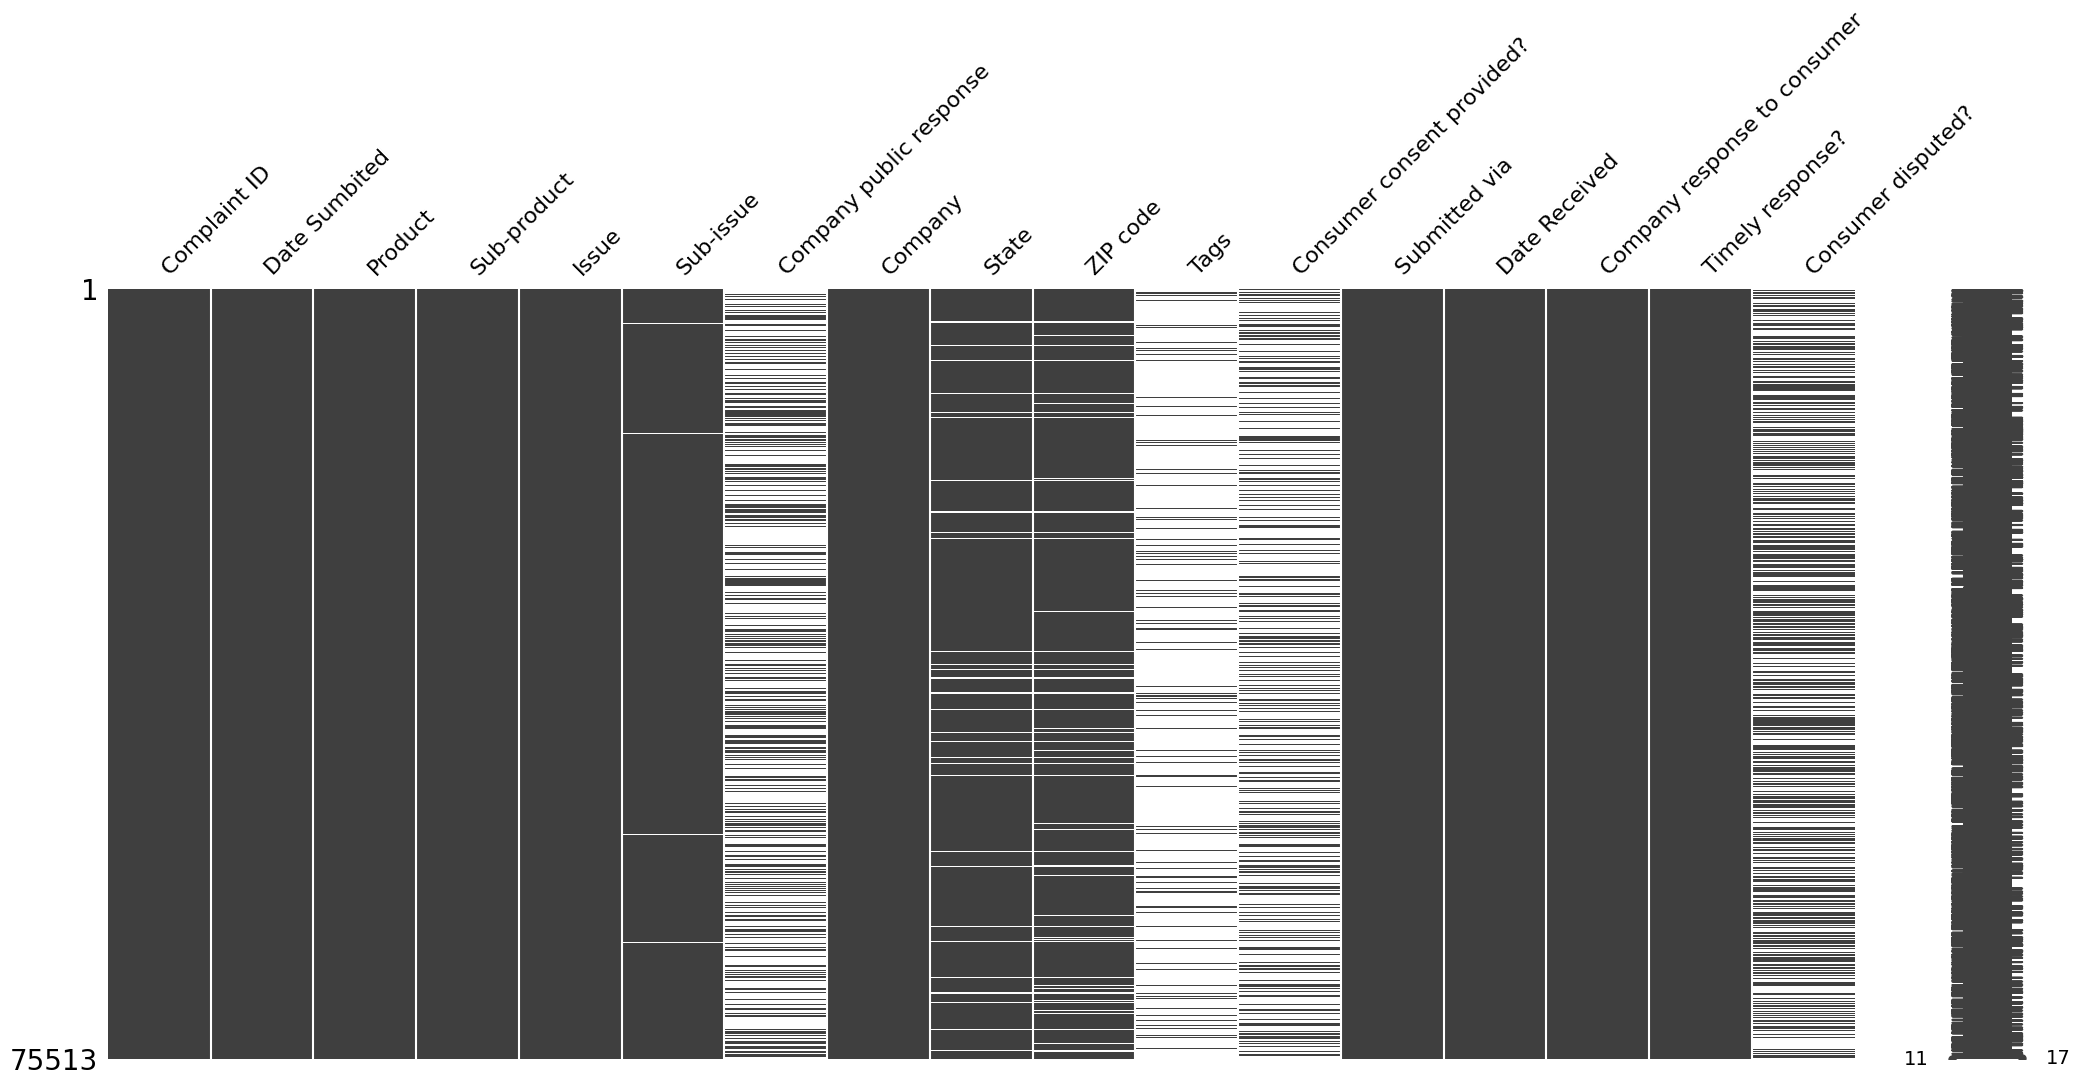

In [ ]:
#Vista rapida de nulos usando un codigo donde anidamos la cantidad de filas en el df
msno.matrix(df_base.sample(df_base.shape[0]))

En este grafico observamos que las columnas ['Sub-issue','Company public response','State,'ZIP code','Tags','Consumer consent provided?','Consumer disputed?'] contienen valores nulos.

In [ ]:
#Corroboramos la cantidad de nulos vs el grafico de arriba (solo los primero 7)
print('Los datos nulos se distribuyen de esta manera:\n\n',df_base.isnull().sum().sort_values(ascending=False)[:7])

Los datos nulos se distribuyen de esta manera:

 Tags                          66560
Consumer consent provided?    52174
Company public response       48178
Consumer disputed?            36947
ZIP code                       4367
State                          2893
Sub-issue                       751
dtype: int64


Aqui notamos que las columnas de nuestro interes inicial:
['Date Sumbited','Issue','Company','State','Date Received','Company response to consumer', 'Timely response?']  NO contienen datos nulos y podemos avanzar con nuestro analisis.
       


In [ ]:
#Otra vista para analizar el tipo de producto con mas quejas.
print("Número de quejas por tipo de producto:\n\n", df_base['Product'].value_counts())


Número de quejas por tipo de producto:

 Product
Credit card                    19176
Checking or savings account    13436
Mortgage                       12470
Credit card or prepaid card    10241
Bank account or service         9893
Debt collection                 7177
Student loan                    2050
Vehicle loan or lease           1070
Name: count, dtype: int64


In [ ]:
print("El tipo de producto con mas quejas es:\n\n", df_base['Product'].value_counts()[:1])

El tipo de producto con mas quejas es:

 Product
Credit card    19176
Name: count, dtype: int64


In [ ]:
#Notamos que las columnas tienen el Dtype que necesitamos ya que previamente al conectarnos al df dimos la instruccion de mantener las columnas tipo date.
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75513 entries, 0 to 75512
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  75513 non-null  int64         
 1   Date Sumbited                 75513 non-null  datetime64[ns]
 2   Product                       75513 non-null  object        
 3   Sub-product                   75513 non-null  object        
 4   Issue                         75513 non-null  object        
 5   Sub-issue                     74762 non-null  object        
 6   Company public response       27335 non-null  object        
 7   Company                       75513 non-null  object        
 8   State                         72620 non-null  object        
 9   ZIP code                      71146 non-null  object        
 10  Tags                          8953 non-null   object        
 11  Consumer consent provided?  

Solo el 19% de las quejas resueltas son disputadas 

 


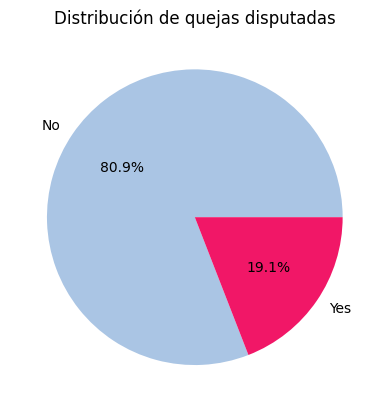

In [ ]:
pastel_colors = ['#aac5e4','#F11767']
plt.pie(df_base['Consumer disputed?'].value_counts(),
        labels=df_base['Consumer disputed?'].value_counts().index,
        colors=pastel_colors,
        autopct='%1.1f%%')
print("Solo el 19% de las quejas resueltas son disputadas \n\n ")
plt.title('Distribución de quejas disputadas')
plt.show()

Notamos que las quejas disputadas no son representativas en nuestro dataset

In [ ]:
#Instalar biblioteca squarify
!pip install squarify

El principal problema reportado es 'Managing an account'

 


Text(0.5, 1.0, 'Problemas reportados en una queja')

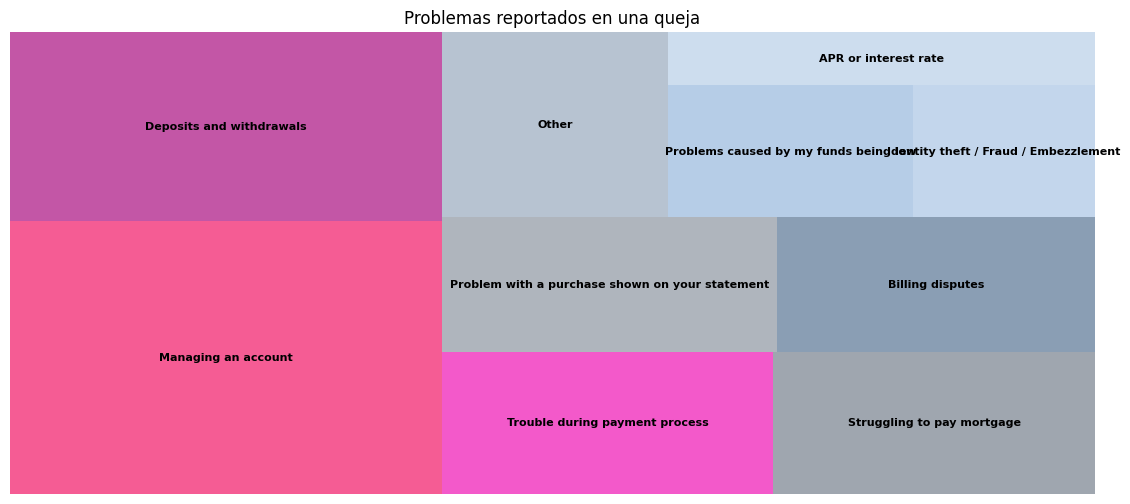

In [ ]:
#Genero treemap de issues
import squarify

dftreemap1 = df_base.groupby('Issue')['Complaint ID'].size().sort_values(ascending=False).reset_index()[:10]
#Ajustar el tamaño de la figura
plt.figure(figsize=(14, 6))
#Defino paleta de colores pastel
pastel_colors = ['#F11767', '#AA0F81', '#EF12B4', '#76818e', '#8d96a1', '#597594', '#99aabe', '#98B9DE', '#aac5e4', '#b9cfe8']
#Treemap
squarify.plot(sizes=dftreemap1['Complaint ID'], label=dftreemap1['Issue'], alpha=.7, color=pastel_colors,text_kwargs={'fontsize': 8, 'weight': 'bold'})
plt.axis('off')
print("El principal problema reportado es 'Managing an account'\n\n ")
plt.title("Problemas reportados en una queja")


In [ ]:
#Selecciono el top 10 de problemas reportados
print("Los problemas reportados en una queja:\n\n",
df_base['Issue'].value_counts().sort_values(ascending=False)[:10])

Los problemas reportados en una queja:

 Issue
Managing an account                                8849
Deposits and withdrawals                           6127
Trouble during payment process                     3534
Struggling to pay mortgage                         3437
Problem with a purchase shown on your statement    3365
Billing disputes                                   3203
Other                                              3135
Problems caused by my funds being low              2432
Identity theft / Fraud / Embezzlement              1801
APR or interest rate                               1704
Name: count, dtype: int64


In [ ]:
print("Los datos unicos en cada columna son:\n\n",
df_base.nunique().sort_values(ascending=False)) #Verificar datos unicos.

Los datos unicos en cada columna son:

 Complaint ID                    75513
ZIP code                        10884
Date Sumbited                    3233
Date Received                    3117
Sub-issue                         170
Issue                              88
State                              61
Sub-product                        46
Product                             8
Company response to consumer        8
Submitted via                       6
Consumer consent provided?          4
Company public response             2
Tags                                2
Timely response?                    2
Consumer disputed?                  2
Company                             1
dtype: int64


In [ ]:
print("Las razones por las que se resolvio una queja son:\n\n",
df_base['Company response to consumer'].value_counts().sort_values(ascending=False))
print("\nEn 2do lugar se encuentra nuestro objetivo de estudio, las quejas resueltas con alivio monetario.")
print("Procedemos a evaluar las 11693 filas que corresponden a nuestro objeto de estudio.\n\n ")

Las razones por las que se resolvio una queja son:

 Company response to consumer
Closed with explanation            54666
Closed with monetary relief        11693
Closed with non-monetary relief     5912
Closed without relief               1779
Closed with relief                   938
In progress                          283
Closed                               241
Untimely response                      1
Name: count, dtype: int64

En 2do lugar se encuentra nuestro objetivo de estudio, las quejas resueltas con alivio monetario.
Procedemos a evaluar las 11693 filas que corresponden a nuestro objeto de estudio.

 






Con 11 693 registros, las quejas resueltas con alivio monetario tienen una representacion significativa en nuestro dataset
El objetivo del estudio sera predecir cuantas quejas necesitaran desembolso monetario 

 


<ipython-input-16-dcdbf323a3c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_base_barplot.index, y=df_base_barplot.values, palette=pastel_colors) #palette='pastel',hue=df_base_barplot.index,)


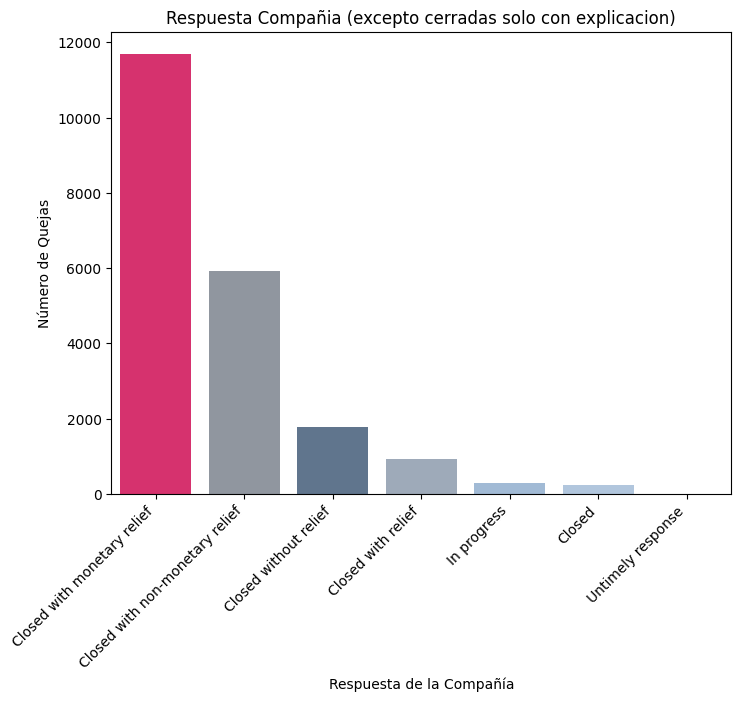

In [ ]:
#Agrupar por 'Company response to consumer' y contar el número de quejas sin los cerrados solo con explicacion.
df_base_barplot = df_base[df_base['Company response to consumer']!='Closed with explanation'].groupby('Company response to consumer')['Complaint ID'].size().sort_values(ascending=False)[:7]
#Crear un gráfico de barras
plt.figure(figsize=(8, 6))
#Defino paleta de colores pastel
pastel_colors = ['#F11767', '#8d96a1', '#597594', '#99aabe', '#98B9DE', '#aac5e4', '#b9cfe8']
sns.barplot(x=df_base_barplot.index, y=df_base_barplot.values, palette=pastel_colors) #palette='pastel',hue=df_base_barplot.index,)
#Definir las leyendas
plt.title("Respuesta Compañia (excepto cerradas solo con explicacion)")
plt.xlabel('Respuesta de la Compañía')
plt.ylabel('Número de Quejas')
#Modifico el eje x para mejor visualizacion.
plt.xticks(rotation=45, ha='right')
print("\n\n\n\nCon 11 693 registros, las quejas resueltas con alivio monetario tienen una representacion significativa en nuestro dataset")
print("El objetivo del estudio sera predecir cuantas quejas necesitaran desembolso monetario \n\n ")
plt.show()

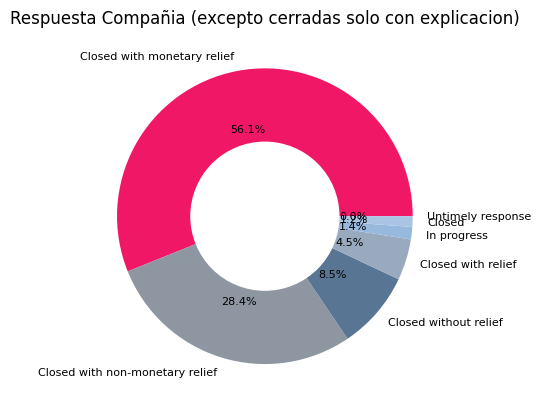

In [ ]:
#Agrupar por 'Company response to consumer' y contar el número de quejas sin los cerrados solo con explicacion
#Quitar el atributo 'Closed with explanation'
df_base_filtered1 = df_base.query("`Company response to consumer` != 'Closed with explanation'").copy()
#Crear grafico de dona
df_base_dounot = df_base_filtered1.groupby('Company response to consumer')['Complaint ID'].size().sort_values(ascending=False)[:7]
my_circle = plt.Circle( (0,0), 0.5, color='white')
# Obtener una paleta de colores pastel
#pastel_colors = sns.color_palette('pastel')
pastel_colors = ['#F11767', '#8d96a1', '#597594', '#99aabe', '#98B9DE', '#aac5e4', '#b9cfe8']
#Ajusto los parametros de index y valores
plt.pie(df_base_dounot.values, labels=df_base_dounot.index,autopct='%1.1f%%', textprops={'fontsize': 8},colors=pastel_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)


plt.title("Respuesta Compañia (excepto cerradas solo con explicacion)")

plt.show()



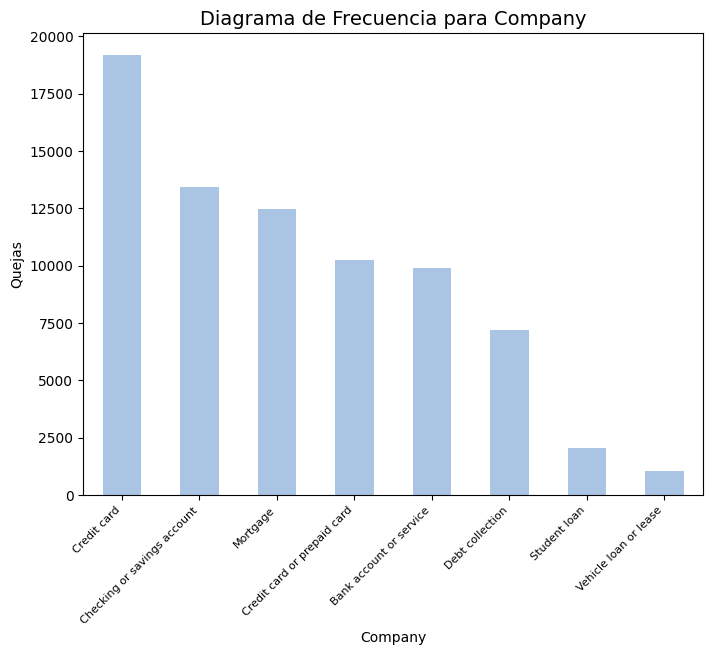

In [ ]:
plt.figure(figsize=(8, 6))
df_base['Product'].value_counts().plot(kind='bar',color='#aac5e4')
plt.xlabel('Company', fontsize=10)
plt.ylabel('Quejas', fontsize=10)
plt.title('Diagrama de Frecuencia para Company', fontsize=14)
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.show()

## **05  INGENIERIA DE ATRIBUTOS, ENTRENAMIENTO Y TESTEO**

### 5.1.- Preparacion de datos

#### 5.1.1  Analisis de la columna target

In [ ]:
#Generamos df de estudio excluyendo la informacion innecesaria por no ser objeto de estudio (Punto "03 HIPOTESIS")
df_estudio = df_base.copy()
df_estudio.drop(columns=['Sub-product','Sub-issue','Complaint ID','Company public response','Date Sumbited','Tags','Consumer consent provided?','Consumer disputed?','Company','State','ZIP code','Date Received'], inplace=True)
#Genero columna binaria target ya que solo estamos interesados en estudiar la clase 'Closed with monetary relief'
df_estudio['Target'] = df_estudio['Company response to consumer'].apply(lambda x: 1 if x == 'Closed with monetary relief' else 0)
df_estudio.head(2)


,Product,Issue,Submitted via,Company response to consumer,Timely response?,Target
0,Credit card or prepaid card,Closing your account,Web,Closed with explanation,Yes,0
1,Debt collection,Improper contact or sharing of info,Web,Closed with explanation,Yes,0


Despues del filtro nuestro df queda con solo 5 columnas

In [ ]:
print("\n La cantidad de filas del df objeto de estudio es: ",df_estudio.shape[0])
print(" La cantidad de columnas del df objeto de estudio es: ",df_estudio.shape[1])
print("\n")
df_estudio.info()


 La cantidad de filas del df objeto de estudio es:  75513
 La cantidad de columnas del df objeto de estudio es:  6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75513 entries, 0 to 75512
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       75513 non-null  object
 1   Issue                         75513 non-null  object
 2   Submitted via                 75513 non-null  object
 3   Company response to consumer  75513 non-null  object
 4   Timely response?              75513 non-null  object
 5   Target                        75513 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.5+ MB


In [ ]:
print( "Los datos unicos que contiene cada columna son:\n\n",df_estudio.nunique())
print( "\n\nLa columna target contiene solo 2 clases, binario")

Los datos unicos que contiene cada columna son:

 Product                          8
Issue                           88
Submitted via                    6
Company response to consumer     8
Timely response?                 2
Target                           2
dtype: int64


La columna target contiene solo 2 clases, binario


In [ ]:
print( "La clase 1 ('Closed with monetary relief') o clase de objeto de estudio tiene 11693 registros\n\n",df_estudio.Target.value_counts())
print( "\n\nLa columna target esta desbalanceada")



La clase 1 ('Closed with monetary relief') o clase de objeto de estudio tiene 11693 registros

 Target
0    63820
1    11693
Name: count, dtype: int64


La columna target esta desbalanceada


#### 5.1.2 UnderSampling = RandomUnderSampler

In [ ]:
# Como nuestra columna target esta desbalanceada utilizamos el undersampling
# Usamos la columna binaria Target que solo evalua la clase 'Closed with monetary relief'

from imblearn.under_sampling import RandomUnderSampler
# Definimos las características (X) & (y)
X = df_estudio.drop(columns=['Target'])
y = df_estudio['Target']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Concatenamos los datos resultantes para crear un nuevo DataFrame
df_resampled = pd.concat([X_res, y_res], axis=1)

print("Misma cantidad de registros por cada clase \n")
print(df_resampled['Target'].value_counts())

print("\nEstos son los valores tanto de la clase 0 como la clase 1:\n")
df_resampled[['Target','Company response to consumer']].value_counts()

Misma cantidad de registros por cada clase 

Target
0    11693
1    11693
Name: count, dtype: int64

Estos son los valores tanto de la clase 0 como la clase 1:



Target  Company response to consumer   
1       Closed with monetary relief        11693
0       Closed with explanation            10076
        Closed with non-monetary relief     1027
        Closed without relief                330
        Closed with relief                   180
        In progress                           43
        Closed                                37
Name: count, dtype: int64

In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23386 entries, 42422 to 75509
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       23386 non-null  object
 1   Issue                         23386 non-null  object
 2   Submitted via                 23386 non-null  object
 3   Company response to consumer  23386 non-null  object
 4   Timely response?              23386 non-null  object
 5   Target                        23386 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [ ]:
df_resampled['Company response to consumer'].value_counts()

Company response to consumer
Closed with monetary relief        11693
Closed with explanation            10076
Closed with non-monetary relief     1027
Closed without relief                330
Closed with relief                   180
In progress                           43
Closed                                37
Name: count, dtype: int64

In [ ]:
df_resampled[['Product','Issue','Submitted via','Company response to consumer']].nunique()

Product                          8
Issue                           87
Submitted via                    6
Company response to consumer     7
dtype: int64

#### 5.1.3 Encoding

In [ ]:
# Elimino la columna target categorica.
df_resampled = df_resampled.drop(columns=['Company response to consumer'])
df_resampled.head()

,Product,Issue,Submitted via,Timely response?,Target
42422,Checking or savings account,Closing an account,Referral,Yes,0
62411,Mortgage,Struggling to pay mortgage,Fax,Yes,0
68875,Debt collection,Communication tactics,Web,Yes,0
34437,Checking or savings account,Closing an account,Web,Yes,0
16590,Credit card or prepaid card,Problem with a purchase shown on your statement,Referral,Yes,0


In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23386 entries, 42422 to 75509
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           23386 non-null  object
 1   Issue             23386 non-null  object
 2   Submitted via     23386 non-null  object
 3   Timely response?  23386 non-null  object
 4   Target            23386 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
# Selecciono las columnas categóricas
categorical_columns = ['Product','Issue','Submitted via','Timely response?',]

# Crear variables dummy para las columnas categóricas
df_dummies = pd.get_dummies(df_resampled, columns=categorical_columns)

df_dummies.head()

,Target,Product_Bank account or service,Product_Checking or savings account,Product_Credit card,Product_Credit card or prepaid card,Product_Debt collection,Product_Mortgage,Product_Student loan,Product_Vehicle loan or lease,Issue_APR or interest rate,...,Issue_Using a debit or ATM card,Issue_Written notification about debt,Submitted via_Email,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Timely response?_No,Timely response?_Yes
42422,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
62411,0,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
68875,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
34437,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
16590,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


### 5.2.- Entrenamiento

#### 5.2.1.- Grupo de prueba y de entrenamiento

In [ ]:
# Seleccionar las características (excluyendo la columna objetivo original)
X = df_dummies.drop(columns=['Target'])

# Seleccionar la columna objetivo
y = df_dummies['Target']

# Dividir los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#### 5.2.2.- LogisticRegression

In [ ]:
# Crear y entrenar el modelo de Regresion Logistica
model_lr = LogisticRegression(max_iter=1000,solver='liblinear')
model_lr.fit(X_train, y_train)

# Obtener predicciones Regresion Logistica
y_pred = model_lr.predict(X_test)

print("LogisticRegression - Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nLogisticRegression - Classification Report:\n")
print(classification_report(y_test, y_pred))


LogisticRegression - Confusion Matrix:

[[2125 1741]
 [ 768 3084]]

LogisticRegression - Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.55      0.63      3866
           1       0.64      0.80      0.71      3852

    accuracy                           0.67      7718
   macro avg       0.69      0.68      0.67      7718
weighted avg       0.69      0.67      0.67      7718



##### 5.2.2.1- Optimizacion Hiperparametro LogisticRegrestion = precision

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

#1 min 31 seg
# Definir el grid de hiperparámetros para la búsqueda aleatoria
params_grid = {
    'C': uniform(loc=0, scale=4),  # Distribución uniforme para el hiperparámetro C
    'penalty': ['l1', 'l2']        # Normas L1 y L2 para la regularización
}

# Configurar RandomizedSearchCV
grid_cv = RandomizedSearchCV(
    model_lr,
    params_grid,
    scoring='precision',
    n_jobs=-1,
    cv=3,
    n_iter=100,
    random_state=42
)

# Ajustar el modelo con los datos de entrenamiento
grid_cv.fit(X_train, y_train)

# Obtener el mejor modelo y predicciones
best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

# Resultados
print("Mejores parámetros:", grid_cv.best_params_)
print("Mejor score de CV (precision):", grid_cv.best_score_)
print(f'Precision del modelo = {round(precision_score(y_test, y_pred, average="binary"), 5)}')

# Matriz de confusión y reporte de clasificación
print("\nLogisticRegression - Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nLogisticRegression - Classification Report:\n")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
129 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
129 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

Mejores parámetros: {'C': 0.23233444867279784, 'penalty': 'l2'}
Mejor score de CV (precision): 0.6486312003863918
Precision del modelo = 0.63891

LogisticRegression - Confusion Matrix:

[[2123 1743]
 [ 768 3084]]

LogisticRegression - Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.55      0.63      3866
           1       0.64      0.80      0.71      3852

    accuracy                           0.67      7718
   macro avg       0.69      0.67      0.67      7718
weighted avg       0.69      0.67      0.67      7718



##### 5.2.2.2- Curva ROC

roc_auc_score for LogisticRegression:  0.7380384092434027


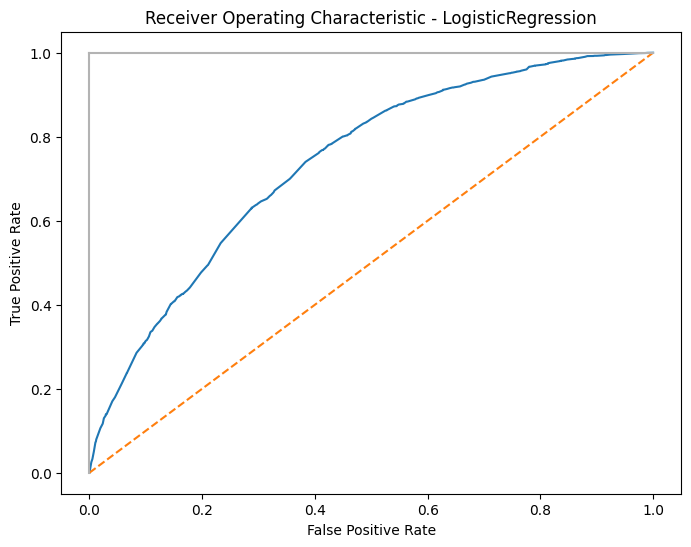

In [ ]:
#Curva ROC para LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = model_lr.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for LogisticRegression: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - LogisticRegression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### 5.2.2.3- Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score


# Definir el modelo
model_lr = LogisticRegression(max_iter=1000)

# Configurar la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Aplicar validación cruzada
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='precision')

print("Logistic Regression - Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(scores_lr.mean(), scores_lr.std()))

# Entrenar el modelo en todo el conjunto de entrenamiento para la evaluación final
model_lr.fit(X_train, y_train)

# Obtener predicciones en el conjunto de prueba
y_pred_lr = model_lr.predict(X_test)

print("\nLogistic Regression - Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_lr))
print("\nLogistic Regression - Classification Report:\n")
print(classification_report(y_test, y_pred_lr))


Logistic Regression - Cross-Validation Accuracy: 0.65 ± 0.00

Logistic Regression - Confusion Matrix:

[[2125 1741]
 [ 768 3084]]

Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.55      0.63      3866
           1       0.64      0.80      0.71      3852

    accuracy                           0.67      7718
   macro avg       0.69      0.68      0.67      7718
weighted avg       0.69      0.67      0.67      7718



#### 5.2.3.- RandomForestClassifier

In [ ]:
# Crear y entrenar el modelo Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Obtener predicciones Random Forest
y_pred_rf = model_rf.predict(X_test)

print("Random Forest - Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))
print("\nnRandom Forest - Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest - Confusion Matrix:

[[2237 1629]
 [ 900 2952]]

nRandom Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.58      0.64      3866
           1       0.64      0.77      0.70      3852

    accuracy                           0.67      7718
   macro avg       0.68      0.67      0.67      7718
weighted avg       0.68      0.67      0.67      7718



roc_auc_score for RandomForestClassifier:  0.7298751087173156


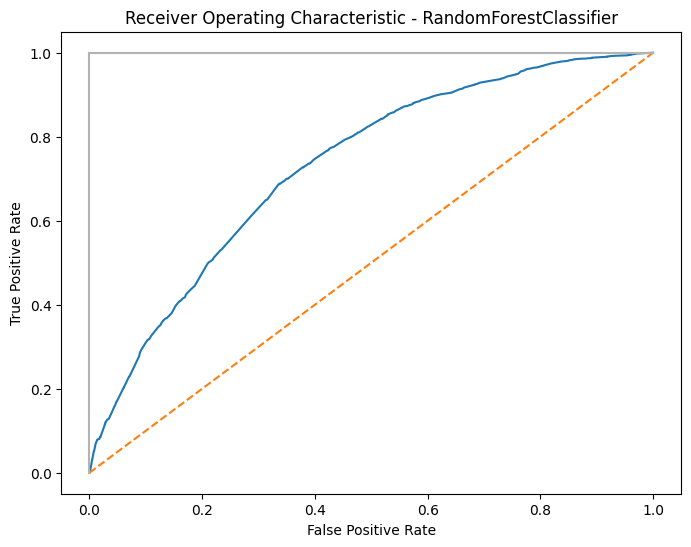

In [ ]:
#Curva ROC para RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

y_score2 = model_rf.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold1 = roc_curve(y_test, y_score2)
print('roc_auc_score for RandomForestClassifier: ', roc_auc_score(y_test, y_score2))

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

# Definir el modelo
model_rf = RandomForestClassifier(random_state=42)

# Configurar la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Aplicar validación cruzada
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=cv, scoring='precision')

print("Random Forest - Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(scores_rf.mean(), scores_rf.std()))

# Entrenar el modelo en todo el conjunto de entrenamiento para la evaluación final
model_rf.fit(X_train, y_train)

# Obtener predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

print("\nRandom Forest - Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest - Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest - Cross-Validation Accuracy: 0.65 ± 0.00

Random Forest - Confusion Matrix:

[[2237 1629]
 [ 900 2952]]

Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.58      0.64      3866
           1       0.64      0.77      0.70      3852

    accuracy                           0.67      7718
   macro avg       0.68      0.67      0.67      7718
weighted avg       0.68      0.67      0.67      7718



#### 5.2.4.- KNeighborsClassifier

In [ ]:
# Definir el numero de vecinos y entrenar el modelo knn
model_knn = KNeighborsClassifier(n_neighbors=8)
model_knn.fit(X_train, y_train)

# Obtener predicciones Knn
y_pred_knn = model_knn.predict(X_test)

print("KNN - Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_knn))
print("\nKNN - Classification Report:\n")
print(classification_report(y_test, y_pred_knn))


KNN - Confusion Matrix:

[[2693 1173]
 [1555 2297]]

KNN - Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.70      0.66      3866
           1       0.66      0.60      0.63      3852

    accuracy                           0.65      7718
   macro avg       0.65      0.65      0.65      7718
weighted avg       0.65      0.65      0.65      7718



##### 5.2.4.1.- Curva ROC

roc_auc_score for KNeighborsClassifier:  0.6982509270853983


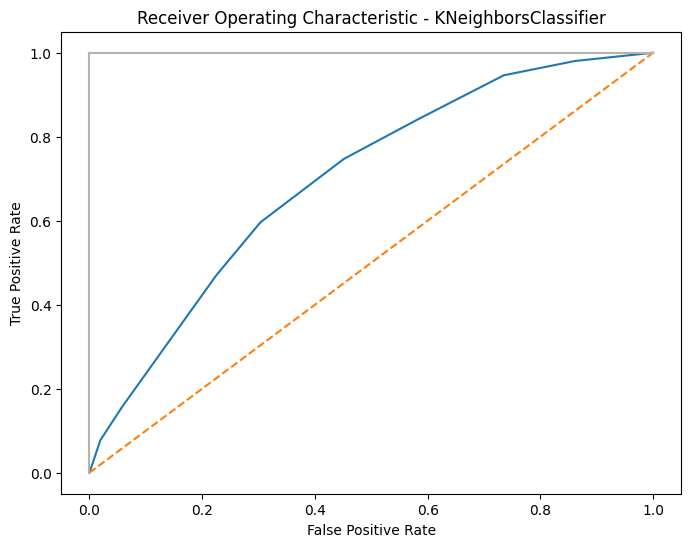

In [ ]:
#Curva ROC para KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

y_score3 = model_knn.predict_proba(X_test)[:,1]
false_positive_rate3, true_positive_rate3, threshold1 = roc_curve(y_test, y_score3)
print('roc_auc_score for KNeighborsClassifier: ', roc_auc_score(y_test, y_score3))

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - KNeighborsClassifier')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### 5.2.4.2.- Optimizacion de hiperparametro KNN = F1 score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Definir el grid de hiperparámetros para KNN
params_grid_knn = {
    'n_neighbors': np.arange(7, 9),  # Rango de vecinos de 7 a 9 (anteriormente probé manualmente y detecté que era 8)
    'weights': ['uniform', 'distance'],  # Estrategias de ponderación
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Tipos de distancia
}

# Configurar RandomizedSearchCV para KNN
grid_cv_knn = RandomizedSearchCV(
    KNeighborsClassifier(),
    params_grid_knn,
    scoring='f1',  # Cambiado a F1-score
    n_jobs=-1,
    cv=3,
    n_iter=100,
    random_state=42
)

# Ajustar el modelo con los datos de entrenamiento
grid_cv_knn.fit(X_train, y_train)

# Obtener el mejor modelo y predicciones
best_model_knn = grid_cv_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

# Resultados
print("\n\nMejores parámetros KNN:", grid_cv_knn.best_params_)
print("Mejor score de CV (F1-score):", grid_cv_knn.best_score_)
print(f'F1-score del modelo KNN = {round(f1_score(y_test, y_pred_knn, average="binary"), 5)}')

# Matriz de confusión y reporte de clasificación
print("\nKNN - Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_knn))
print("\nKNN - Classification Report:\n")
print(classification_report(y_test, y_pred_knn))
print("\n\nA pesar de la optimizacion de hiperparametro para F1")
print("la precision, accuracy y el recall no cambiaron significativamente")
print("por lo cual se desestima seguir trabajando con estas modificaciones\n")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(




Mejores parámetros KNN: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'euclidean'}
Mejor score de CV (F1-score): 0.6419939558131854
F1-score del modelo KNN = 0.64655

KNN - Confusion Matrix:

[[2514 1352]
 [1366 2486]]

KNN - Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      3866
           1       0.65      0.65      0.65      3852

    accuracy                           0.65      7718
   macro avg       0.65      0.65      0.65      7718
weighted avg       0.65      0.65      0.65      7718



A pesar de la optimizacion de hiperparametro para F1
la precision, accuracy y el recall no cambiaron significativamente
por lo cual se desestima seguir trabajando con estas modificaciones



##### 5.2.4.3.- Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Aplicar SelectKBest para seleccionar las k mejores características
k_best = SelectKBest(score_func=chi2, k='all')  # Buscar todas las caracteristicas
k_best.fit(X_train, y_train)

# Obtener los scores de cada característica
scores = k_best.scores_

feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': scores})

# Ordenar las características por score
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Mostrar las 10 características principales
print(feature_scores.head(10))


                                         Feature       Score
5                               Product_Mortgage  638.765346
79              Issue_Struggling to pay mortgage  333.951697
4                        Product_Debt collection  319.038135
63  Issue_Problem caused by your funds being low  192.375086
54                                Issue_Late fee  183.632826
18                        Issue_Billing disputes  158.394418
87          Issue_Trouble during payment process  143.020646
45                        Issue_Fees or interest  140.958447
73   Issue_Problems caused by my funds being low  136.526959
6                           Product_Student loan  129.238556


In [ ]:
# Probamos otro numero de caracteristicas, pero 10 es el mas apropiado.
num_features_to_select = 10
selected_features = feature_scores['Feature'].head(num_features_to_select).tolist()

# Actualizar X_train y X_test con las Feature Selection
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_knn.fit(X_train_selected, y_train)
y_pred_knn_selected = model_knn.predict(X_test_selected)

# Evaluar el nuevo modelo
print("KNN con Feature Selection - Matriz de Confusión:\n")
print(confusion_matrix(y_test, y_pred_knn_selected))
print("\nKNN con Feature Selection - Informe de Clasificación:\n")
print(classification_report(y_test, y_pred_knn_selected))
print("\n\nA pesar que con Feature Selection el precision aumento a 75%")
print("el accuracy y el recall bajo")
print("por lo cual se desestima seguir trabajando con estas modificaciones\n")


KNN con Feature Selection - Matriz de Confusión:

[[3521  345]
 [2791 1061]]

KNN con Feature Selection - Informe de Clasificación:

              precision    recall  f1-score   support

           0       0.56      0.91      0.69      3866
           1       0.75      0.28      0.40      3852

    accuracy                           0.59      7718
   macro avg       0.66      0.59      0.55      7718
weighted avg       0.66      0.59      0.55      7718



A pesar que con Feature Selection el precision aumento a 75%
el accuracy y el recall bajo
por lo cual se desestima seguir trabajando con estas modificaciones



### 5.3.- Modelo Seleccionado - Ensamble - XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Definir y entrenar el modelo XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

# Obtener predicciones XGBoost
y_pred_xgb = model_xgb.predict(X_test)

print("XGBoost - Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nXGBoost - Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))


XGBoost - Confusion Matrix:

[[2199 1667]
 [ 865 2987]]

XGBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.57      0.63      3866
           1       0.64      0.78      0.70      3852

    accuracy                           0.67      7718
   macro avg       0.68      0.67      0.67      7718
weighted avg       0.68      0.67      0.67      7718



roc_auc_score for XGB Classifier:  0.7376763651376137


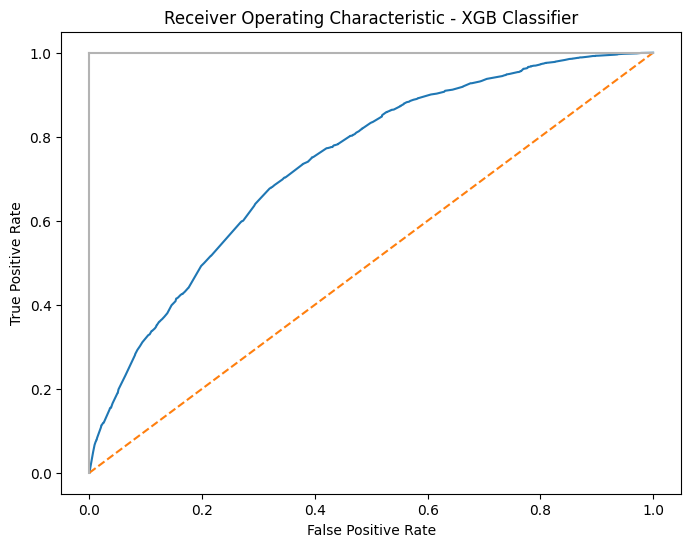

In [ ]:
#Curva ROC para KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

y_score4 = model_xgb.predict_proba(X_test)[:,1]
false_positive_rate3, true_positive_rate3, threshold1 = roc_curve(y_test, y_score4)
print('roc_auc_score for XGB Classifier: ', roc_auc_score(y_test, y_score4))

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - XGB Classifier')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **06   RESULTADOS**


### Matriz de Confusion para el modelo XGB Classifier



*   Verdaderos positivos (VP): 2199 veces - El modelo predijo correctamente la clase 1
*   Falsos positivos (FP): 1667 veces - El modelo predijo incorrectamente la clase 1
*   Falsos negativos (FN): 865 veces - El modelo predijo incorrectamente la clase 0
*   Verdaderos negativos (VN): 2987 veces - El modelo predijo correctamente la clase 0





### Informe de Clasificacion del modelo XGB Classifier



*   **Precision:** Es la proporción de predicciones correctas sobre el total de predicciones para una clase.

Para la clase 0 es 64% mientras que para **la clase 1 es 72%.**



*   **Recall o Sensibilidad:** Es la proporción de positivos reales que se identificaron correctamente.

Para la clase 0 es 57% mientras que para **la clase 1 es 78%.**



*   **F1-Score: **Es el promedio armónico de la precisión y el recall. Un F1 alto indica un equilibrio entre precisión y recall.

Para la clase 0 es 63% mientras que para **la clase 1 es 70%.**



*   **Accuracy:** Es la proporción de predicciones correctas sobre el total de predicciones.

Para el modelo XGB Classifier el accuracy *67%*




## **07   CONCLUSIONES Y RECOMENDACIONES**

CONCLUSIONES:



1.   El modelo XGBoost ha demostrado una precisión de 67%, lo que indica una capacidad moderada para predecir correctamente las quejas resueltas con alivio financiero.

2.   La clase 1 (quejas resueltas con alivio financiero) tiene un recall del 78%, lo que significa que el modelo es bastante bueno para identificar estas quejas correctamente.

3.   La clase 0 (quejas no resueltas con alivio financiero) tiene una precisión del 72% pero un recall más bajo del 57%, lo que sugiere que el modelo tiende a clasificar más quejas como resueltas con alivio financiero cuando no lo son.



RECOMENDACIONES:



1.   El modelo predice que una queja se resolverá con alivio financiero con certeza del 64% de las veces. Ademas, el modelo se asegura que el 78% de las veces se identificara correctamente cuales son las las quejas que se resolveran con desembolso de dinero.



2.   Se opta por un f1 score mas alto para la clase 1 ya que es la clase que determinara el desembolso de dinero con un balance de precision y recall.

